<a href="https://colab.research.google.com/github/Savville/machine_learning_in_structures/blob/main/3D_drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Security Guard House 3D Model...
Building Specifications:
Length: 3.01 m
Width: 2.1 m
Wall Height: 2.7 m
Roof Peak Height: 3.1 m
Door: 0.9m wide x 2.0m high
Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)


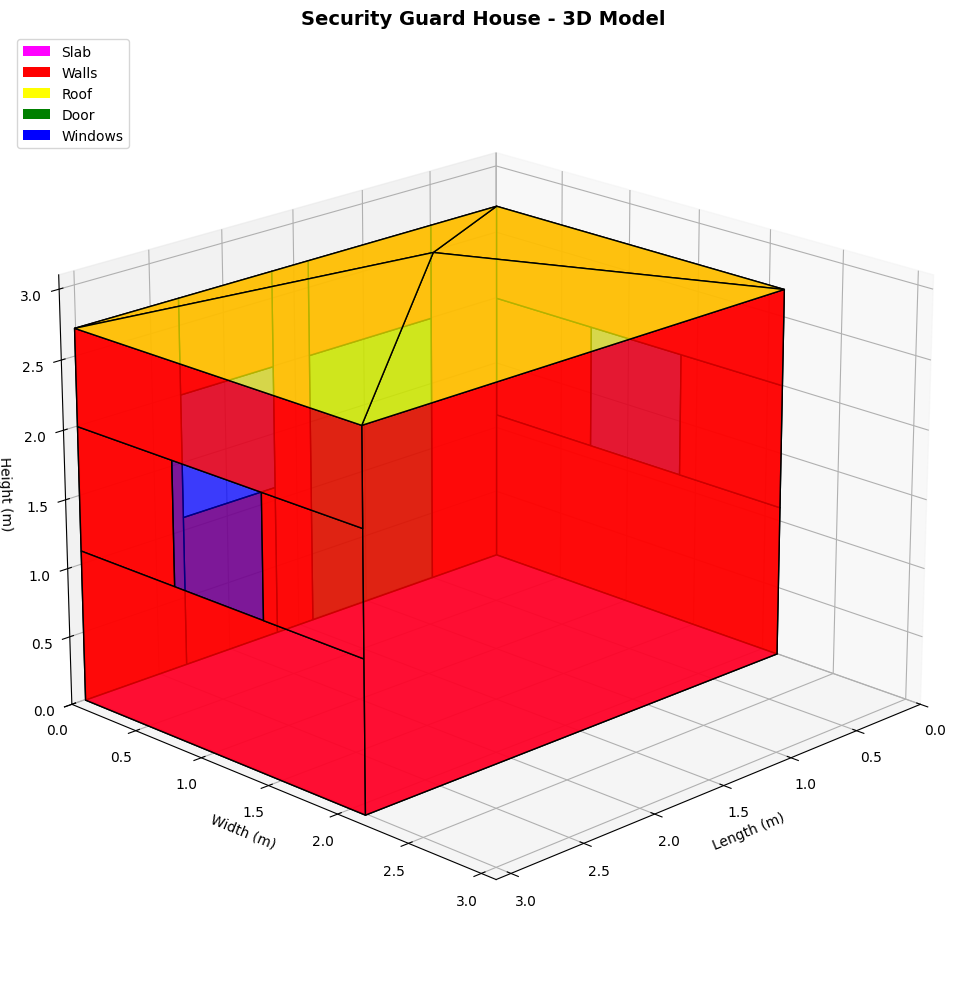

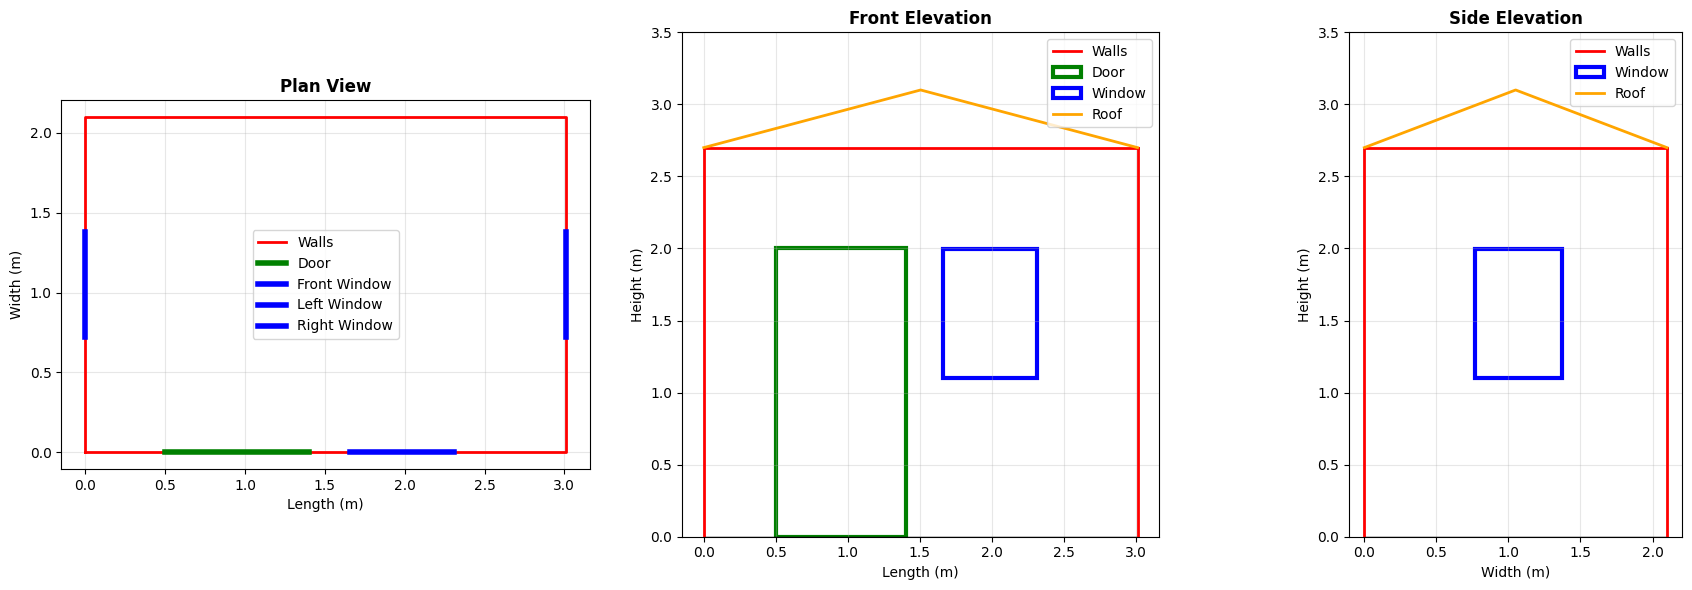


AutoCAD Command Sequence:

LAYER
M WALLS C 1
M DOOR C 3  
M WINDOWS C 5
M ROOF C 2
M SLAB C 8

LAYER
S SLAB
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C

LAYER
S WALLS
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

LAYER
S DOOR
LINE 0.5,0,0 0.5,0,2
LINE 1.4,0,0 1.4,0,2
LINE 0.5,0,2 1.4,0,2

LAYER
S WINDOWS
# Front window
LINE 1.66,0,1.1 1.66,0,2.0
LINE 2.31,0,1.1 2.31,0,2.0
LINE 1.66,0,2.0 2.31,0,2.0
LINE 1.66,0,1.1 2.31,0,1.1

# Left side window
LINE 0,0.72,1.1 0,0.72,2.0
LINE 0,1.38,1.1 0,1.38,2.0
LINE 0,0.72,2.0 0,1.38,2.0
LINE 0,0.72,1.1 0,1.38,1.1

# Right side window
LINE 3.01,0.72,1.1 3.01,0.72,2.0
LINE 3.01,1.38,1.1 3.01,1.38,2.0
LINE 3.01,0.72,2.0 3.01,1.38,2.0
LINE 3.01,0.72,1.1 3.01,1.38,1.1

LAYER
S ROOF
LINE 0,0,2.7 1.505,1.05,3.1
LINE 3.01,0,2.7 1.505,1.05,3.1
LINE 0,2.1,2.7 1.505,1.05,3.1
LINE 3.01,2.1,2.7 1.505,1.05,3.1



In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_guard_house():
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for different components (matching AutoCAD layer colors)
    colors = {
        'walls': 'red',      # Color 1
        'roof': 'yellow',    # Color 2
        'door': 'green',     # Color 3
        'windows': 'blue',   # Color 5
        'slab': 'magenta'    # Color 8
    }

    # Building dimensions
    length = 3.01  # X direction
    width = 2.1    # Y direction
    wall_height = 2.7
    roof_peak_height = 3.1
    slab_thickness = 0.1

    # SLAB (foundation)
    slab_vertices = [
        [0, 0, 0], [length, 0, 0], [length, width, 0], [0, width, 0]
    ]
    slab = [slab_vertices]
    ax.add_collection3d(Poly3DCollection(slab, facecolors=colors['slab'], alpha=0.7, edgecolors='black'))

    # WALLS
    # Front wall (with door and window openings)
    front_wall_segments = [
        # Left segment (0 to 0.5m)
        [[0, 0, 0], [0.5, 0, 0], [0.5, 0, wall_height], [0, 0, wall_height]],
        # Between door and window (1.4 to 1.66m)
        [[1.4, 0, 0], [1.66, 0, 0], [1.66, 0, wall_height], [1.4, 0, wall_height]],
        # Between window and right corner (2.31 to 3.01m)
        [[2.31, 0, 0], [length, 0, 0], [length, 0, wall_height], [2.31, 0, wall_height]],
        # Above door
        [[0.5, 0, 2.0], [1.4, 0, 2.0], [1.4, 0, wall_height], [0.5, 0, wall_height]],
        # Above window
        [[1.66, 0, 2.0], [2.31, 0, 2.0], [2.31, 0, wall_height], [1.66, 0, wall_height]],
        # Below window
        [[1.66, 0, 0], [2.31, 0, 0], [2.31, 0, 1.1], [1.66, 0, 1.1]]
    ]

    for segment in front_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Back wall (solid)
    back_wall = [[0, width, 0], [length, width, 0], [length, width, wall_height], [0, width, wall_height]]
    ax.add_collection3d(Poly3DCollection([back_wall], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Left wall (with window opening)
    left_wall_segments = [
        # Bottom section (below window)
        [[0, 0, 0], [0, width, 0], [0, width, 1.1], [0, 0, 1.1]],
        # Above window
        [[0, 0, 2.0], [0, width, 2.0], [0, width, wall_height], [0, 0, wall_height]],
        # Left of window (0 to 0.72m)
        [[0, 0, 1.1], [0, 0.72, 1.1], [0, 0.72, 2.0], [0, 0, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[0, 1.38, 1.1], [0, width, 1.1], [0, width, 2.0], [0, 1.38, 2.0]]
    ]

    for segment in left_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # Right wall (with window opening)
    right_wall_segments = [
        # Bottom section (below window)
        [[length, 0, 0], [length, width, 0], [length, width, 1.1], [length, 0, 1.1]],
        # Above window
        [[length, 0, 2.0], [length, width, 2.0], [length, width, wall_height], [length, 0, wall_height]],
        # Left of window (0 to 0.72m)
        [[length, 0, 1.1], [length, 0.72, 1.1], [length, 0.72, 2.0], [length, 0, 2.0]],
        # Right of window (1.38 to 2.1m)
        [[length, 1.38, 1.1], [length, width, 1.1], [length, width, 2.0], [length, 1.38, 2.0]]
    ]

    for segment in right_wall_segments:
        ax.add_collection3d(Poly3DCollection([segment], facecolors=colors['walls'], alpha=0.8, edgecolors='black'))

    # DOOR (front wall)
    door_frame = [
        [[0.5, 0, 0], [1.4, 0, 0], [1.4, 0, 2.0], [0.5, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(door_frame, facecolors=colors['door'], alpha=0.6, edgecolors='black'))

    # WINDOWS
    # Front window
    front_window = [
        [[1.66, 0, 1.1], [2.31, 0, 1.1], [2.31, 0, 2.0], [1.66, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(front_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Left side window
    left_window = [
        [[0, 0.72, 1.1], [0, 1.38, 1.1], [0, 1.38, 2.0], [0, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(left_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Right side window
    right_window = [
        [[length, 0.72, 1.1], [length, 1.38, 1.1], [length, 1.38, 2.0], [length, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(right_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # ROOF (pyramid style)
    roof_peak = [length/2, width/2, roof_peak_height]  # Center peak at 3.1m height

    # Four triangular roof faces
    roof_faces = [
        # Front face
        [[0, 0, wall_height], [length, 0, wall_height], roof_peak],
        # Back face
        [[0, width, wall_height], [length, width, wall_height], roof_peak],
        # Left face
        [[0, 0, wall_height], [0, width, wall_height], roof_peak],
        # Right face
        [[length, 0, wall_height], [length, width, wall_height], roof_peak]
    ]

    for face in roof_faces:
        ax.add_collection3d(Poly3DCollection([face], facecolors=colors['roof'], alpha=0.7, edgecolors='black'))

    # Set axis properties
    ax.set_xlabel('Length (m)')
    ax.set_ylabel('Width (m)')
    ax.set_zlabel('Height (m)')
    ax.set_title('Security Guard House - 3D Model', fontsize=14, fontweight='bold')

    # Set equal aspect ratio and limits
    max_range = max(length, width, roof_peak_height)
    ax.set_xlim(0, max_range)
    ax.set_ylim(0, max_range)
    ax.set_zlim(0, max_range)

    # Add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=colors['slab'], label='Slab'),
        plt.Rectangle((0,0),1,1, facecolor=colors['walls'], label='Walls'),
        plt.Rectangle((0,0),1,1, facecolor=colors['roof'], label='Roof'),
        plt.Rectangle((0,0),1,1, facecolor=colors['door'], label='Door'),
        plt.Rectangle((0,0),1,1, facecolor=colors['windows'], label='Windows')
    ]
    ax.legend(handles=legend_elements, loc='upper left')

    # Set viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    return fig

def generate_2d_plans():
    """Generate 2D plan, front, and side views"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # PLAN VIEW
    ax1.set_aspect('equal')
    ax1.set_title('Plan View', fontweight='bold')

    # Outer walls
    ax1.plot([0, 3.01, 3.01, 0, 0], [0, 0, 2.1, 2.1, 0], 'r-', linewidth=2, label='Walls')

    # Door (0.5m from left corner, 0.9m wide)
    ax1.plot([0.5, 1.4], [0, 0], 'g-', linewidth=4, label='Door')

    # Front window (0.7m from right corner, 0.65m wide)
    ax1.plot([1.66, 2.31], [0, 0], 'b-', linewidth=4, label='Front Window')

    # Side windows (0.66m wide, centered)
    window_start = (2.1 - 0.66) / 2
    window_end = window_start + 0.66
    ax1.plot([0, 0], [window_start, window_end], 'b-', linewidth=4, label='Left Window')
    ax1.plot([3.01, 3.01], [window_start, window_end], 'b-', linewidth=4, label='Right Window')

    ax1.set_xlabel('Length (m)')
    ax1.set_ylabel('Width (m)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # FRONT VIEW
    ax2.set_aspect('equal')
    ax2.set_title('Front Elevation', fontweight='bold')

    # Ground line
    ax2.plot([0, 3.01], [0, 0], 'k-', linewidth=1)

    # Walls
    ax2.plot([0, 0], [0, 2.7], 'r-', linewidth=2, label='Walls')
    ax2.plot([3.01, 3.01], [0, 2.7], 'r-', linewidth=2)
    ax2.plot([0, 3.01], [2.7, 2.7], 'r-', linewidth=2)

    # Door
    ax2.add_patch(plt.Rectangle((0.5, 0), 0.9, 2.0, fill=False, edgecolor='green', linewidth=3, label='Door'))

    # Front window
    ax2.add_patch(plt.Rectangle((1.66, 1.1), 0.65, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof
    ax2.plot([0, 1.505, 3.01], [2.7, 3.1, 2.7], 'orange', linewidth=2, label='Roof')

    ax2.set_xlabel('Length (m)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(0, 3.5)

    # SIDE VIEW
    ax3.set_aspect('equal')
    ax3.set_title('Side Elevation', fontweight='bold')

    # Ground line
    ax3.plot([0, 2.1], [0, 0], 'k-', linewidth=1)

    # Walls
    ax3.plot([0, 0], [0, 2.7], 'r-', linewidth=2, label='Walls')
    ax3.plot([2.1, 2.1], [0, 2.7], 'r-', linewidth=2)
    ax3.plot([0, 2.1], [2.7, 2.7], 'r-', linewidth=2)

    # Side window (0.77m from back, 0.6m width)
    window_start = 0.77
    window_end = window_start + 0.6
    ax3.add_patch(plt.Rectangle((window_start, 1.1), 0.6, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof
    ax3.plot([0, 1.05, 2.1], [2.7, 3.1, 2.7], 'orange', linewidth=2, label='Roof')

    ax3.set_xlabel('Width (m)')
    ax3.set_ylabel('Height (m)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_ylim(0, 3.5)

    plt.tight_layout()
    return fig

def print_autocad_commands():
    """Print the AutoCAD command sequence"""
    commands = """
AutoCAD Command Sequence:
========================

LAYER
M WALLS C 1
M DOOR C 3
M WINDOWS C 5
M ROOF C 2
M SLAB C 8

LAYER
S SLAB
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C

LAYER
S WALLS
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

LAYER
S DOOR
LINE 0.5,0,0 0.5,0,2
LINE 1.4,0,0 1.4,0,2
LINE 0.5,0,2 1.4,0,2

LAYER
S WINDOWS
# Front window
LINE 1.66,0,1.1 1.66,0,2.0
LINE 2.31,0,1.1 2.31,0,2.0
LINE 1.66,0,2.0 2.31,0,2.0
LINE 1.66,0,1.1 2.31,0,1.1

# Left side window
LINE 0,0.72,1.1 0,0.72,2.0
LINE 0,1.38,1.1 0,1.38,2.0
LINE 0,0.72,2.0 0,1.38,2.0
LINE 0,0.72,1.1 0,1.38,1.1

# Right side window
LINE 3.01,0.72,1.1 3.01,0.72,2.0
LINE 3.01,1.38,1.1 3.01,1.38,2.0
LINE 3.01,0.72,2.0 3.01,1.38,2.0
LINE 3.01,0.72,1.1 3.01,1.38,1.1

LAYER
S ROOF
LINE 0,0,2.7 1.505,1.05,3.1
LINE 3.01,0,2.7 1.505,1.05,3.1
LINE 0,2.1,2.7 1.505,1.05,3.1
LINE 3.01,2.1,2.7 1.505,1.05,3.1

ZOOM E
"""
    print(commands)

def main():
    """Main function to generate all views"""
    print("Generating Security Guard House 3D Model...")
    print("=" * 50)

    # Print building specifications
    print("Building Specifications:")
    print(f"Length: 3.01 m")
    print(f"Width: 2.1 m")
    print(f"Wall Height: 2.7 m")
    print(f"Roof Peak Height: 3.1 m")
    print(f"Door: 0.9m wide x 2.0m high")
    print(f"Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)")
    print("=" * 50)

    # Generate 3D model
    fig_3d = create_guard_house()
    plt.show()

    # Generate 2D plans
    fig_2d = generate_2d_plans()
    plt.show()

    # Print AutoCAD commands
    print_autocad_commands()

if __name__ == "__main__":
    main()